In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
timeseries_path = os.path.join('COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series')

timeseries_deaths = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Deaths.csv'))
timeseries_recovered = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Recovered.csv'))

timeseries_cases = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Confirmed.csv'))
timeseries_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,43,43,47,48,50,50,50,53,59
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,274,293,331,360,420,461,502,511,581,639
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,108,110,110,117,130,138,150,150,160,178
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,29,36,50,50,83,93,99,117,129,149


In [4]:
nl_timeseries_deaths = timeseries_deaths[timeseries_deaths['Country/Region'] == 'Netherlands']
nl_timeseries_recovered = timeseries_recovered[timeseries_recovered['Country/Region'] == 'Netherlands']
nl_timeseries_cases = timeseries_cases[timeseries_cases['Country/Region'] == 'Netherlands']
nl_timeseries_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
42,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,18,24,38,82,128,188,265,321,382,503


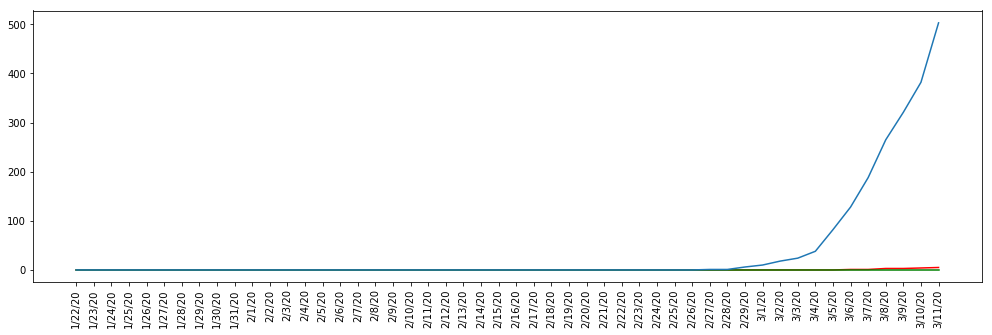

In [5]:
nl_timeseries_cases_day = nl_timeseries_cases.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).iloc[0]
nl_timeseries_deaths_day = nl_timeseries_deaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).iloc[0]
nl_timeseries_recovered_day = nl_timeseries_recovered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).iloc[0]

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(nl_timeseries_deaths_day, c='r')
ax.plot(nl_timeseries_recovered_day, c='g')
ax.plot(nl_timeseries_cases_day)

plt.xticks(rotation=90)
plt.show()

/Users/melvinkoopmans/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


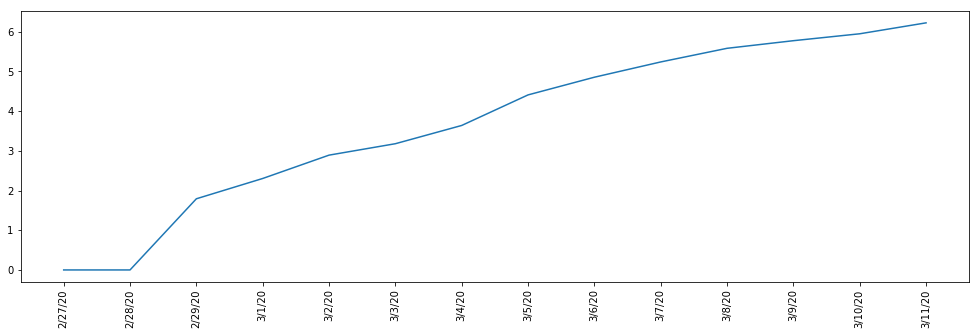

In [6]:
log_nl_timeseries_cases_day = np.log(nl_timeseries_cases_day)

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(log_nl_timeseries_cases_day)

plt.xticks(rotation=90)
plt.show()

In [7]:
n_days = 7
last_n_days = nl_timeseries_cases_day[-n_days:]

print('Amount increased by a factor of {}x in the last {} days.'.format(int(last_n_days[-1] / last_n_days[0]), n_days))
print('The current growth-factor is: {}.'.format(round(last_n_days[-1] / last_n_days[-2], 2)))
print('Current rate of death is {}% by cases.'.format(round(nl_timeseries_deaths_day.sum() / nl_timeseries_cases_day.sum(), 2)))
print('Current rate of death is {}% by recovered.'.format('?' if nl_timeseries_recovered_day.sum() == 0 else round(nl_timeseries_deaths_day.sum() / nl_timeseries_recovered_day.sum(), 2)))

Amount increased by a factor of 6x in the last 7 days.
The current growth-factor is: 1.32.
Current rate of death is 0.01% by cases.
Current rate of death is ?% by recovered.


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
cases_from_start = log_nl_timeseries_cases_day[log_nl_timeseries_cases_day > 0]

X = np.arange(1, len(cases_from_start) + 1, 1).reshape(-1, 1)
y = cases_from_start.values

log_res = LinearRegression()
log_res.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
from datetime import datetime, timedelta

start_datetime = datetime.strptime(cases_from_start.index[0], '%m/%d/%y')

days = []
current_day = start_datetime

for day in np.arange(1, len(cases_from_start) + 1 + 5):
    current_day = current_day + timedelta(days=1)
    days.append(current_day.strftime('%m/%d/%Y'))

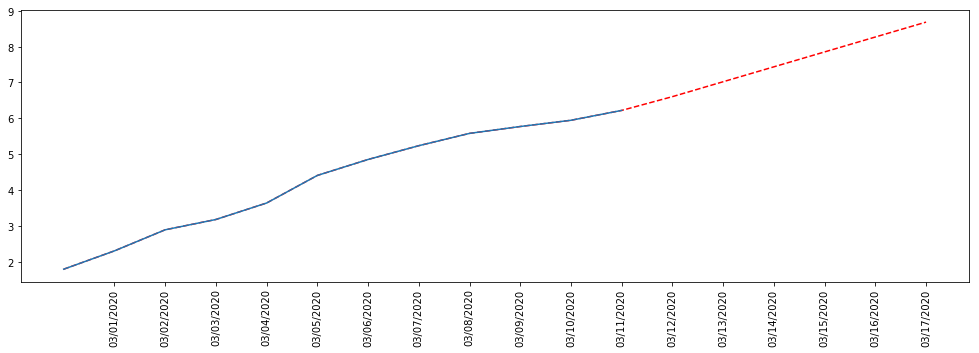

In [22]:
predictions = log_res.predict(np.arange(len(cases_from_start), len(cases_from_start) + 1 + 5, 1).reshape(-1, 1))
predictions = np.concatenate([cases_from_start, predictions])

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(predictions, c='r', linestyle='--')
ax.set_xticks(np.arange(1, len(cases_from_start) + 1 + 5, 1))
ax.set_xticklabels(days)
ax.plot(cases_from_start)
ax.plot()

plt.xticks(rotation=90)
plt.show()

[1119. 1696. 2571. 3897. 5906.]


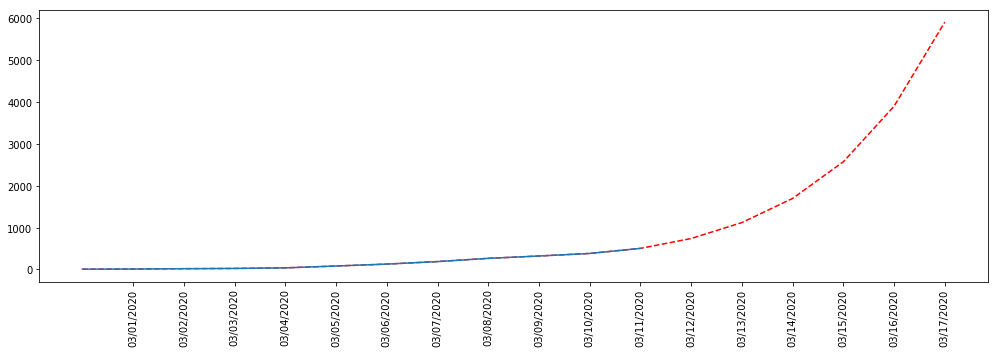

In [24]:
predictions_normal_scale = np.exp(predictions)
cases_from_start_normal = np.exp(cases_from_start)

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(predictions_normal_scale, c='r', linestyle='--')
ax.set_xticks(np.arange(1, len(cases_from_start_normal) + 1 + 5, 1))
ax.set_xticklabels(days)
ax.plot(cases_from_start_normal)
ax.plot()

print(np.round(predictions_normal_scale[-5:]))
plt.xticks(rotation=90)
plt.show()